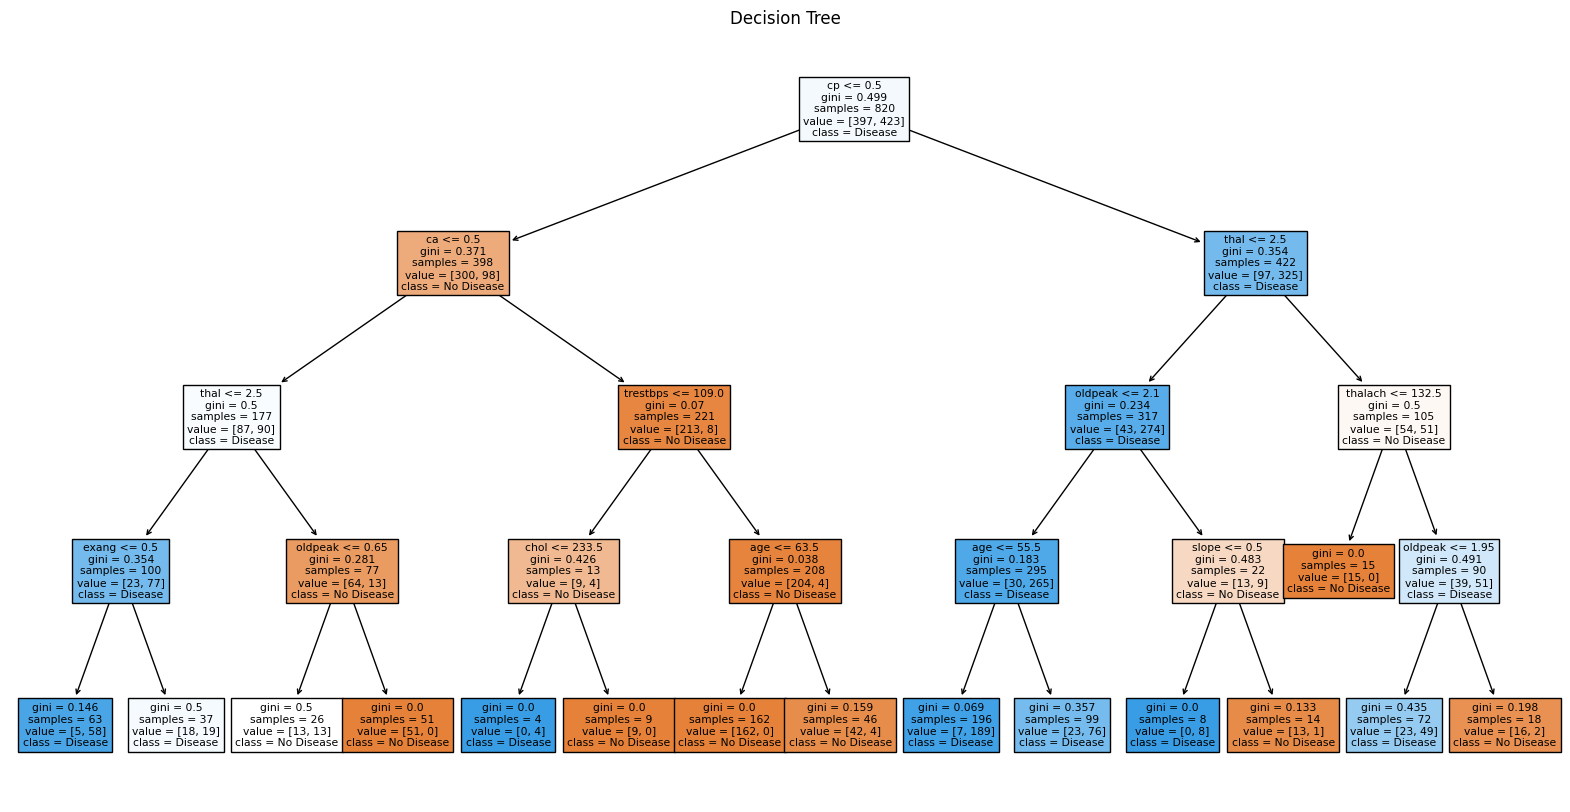

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

Confusion Matrix:
[[71 31]
 [10 93]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



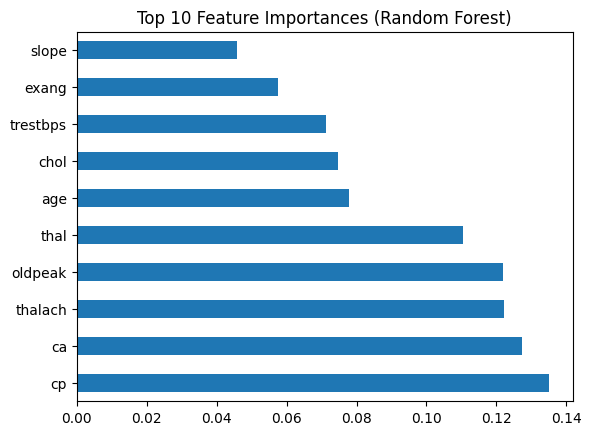

Random Forest Cross-Validation Accuracy: 0.9970731707317073


In [8]:
########################## SECTION-1 (IMPORT LIBRARIES) ###############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

########################## SECTION-2 (LOAD & PREP DATA) ###############################

df = pd.read_csv(r"C:\\Users\\Nitin Dutt Majji\\Downloads\\B.TECH\\Elevate Labs\\heart.csv")
df.head()

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

########################## SECTION-3 (DECISION TREE CLASSIFIER) ########################
# Instantiate and train the Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns.tolist(), class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree")
plt.show()

# Evaluate the Decision Tree model
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


########################## SECTION-4 (RANDOM FOREST CLASSIFIER) ########################
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature Importance (Random Forest)
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

########################## SECTION-5 (CROSS VALIDATION) ################################
cv_score = cross_val_score(rf, X, y, cv=5)
print("Random Forest Cross-Validation Accuracy:", np.mean(cv_score))
